In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from looti import read_files as rf


In [83]:
FrameConstructor = rf.FrameConstructor(path_config_file='../readfile_configs/input4cast_lhs_Plin.yaml')

In [84]:
folders = FrameConstructor.read_folder(FrameConstructor.folders_path)

In [15]:
def one_folder(folder):

    config_dict = FrameConstructor.read_config(FrameConstructor.folders_path, folder, FrameConstructor.params_file)
    # params_dict = FrameConstructor.create_parameter_dictionary(pars_dict, config_dict)

    z_array, k_array, observable = FrameConstructor.read_files(FrameConstructor.folders_path, folder,  FrameConstructor.z_file_name, FrameConstructor.k_file_name, FrameConstructor.data_file_name)

    names = ['data_type', 'redshift']
    for i, pp in enumerate(config_dict.keys()): ## pars_dict
        names.append('parameter_' + str(i+1))
        names.append('parameter_' + str(i+1) + '_value')

    values = []
    for zz in z_array:
        temp = [FrameConstructor.data_type, zz]
        for p, v in zip(config_dict.keys(), config_dict.values()): ## pars_dict, pars_dict
            temp.append(p)
            temp.append(v)
        values.append(temp)

    multiIndex1 = pd.MultiIndex.from_tuples(values, names=names)

    columns = np.arange(1, len(k_array)+1)


    dataframe = pd.DataFrame(data=observable, index=multiIndex1, columns=columns)

    return dataframe, k_array, z_array

In [ ]:
dataframe = pd.DataFrame()

for folder in folders:

    config_dict = FrameConstructor.read_config(FrameConstructor.folders_path, folder, FrameConstructor.params_file)
    # params_dict = FrameConstructor.create_parameter_dictionary(pars_dict, config_dict)

    z_array, k_array, observable = FrameConstructor.read_files(FrameConstructor.folders_path, folder,  FrameConstructor.z_file_name, FrameConstructor.k_file_name, FrameConstructor.data_file_name)

    names = ['data_type', 'redshift']
    for i, pp in enumerate(config_dict.keys()): ## pars_dict
        names.append('parameter_' + str(i+1))
        names.append('parameter_' + str(i+1) + '_value')

 
    values = [FrameConstructor.data_type, 0.0]
    for p, v in zip(config_dict.keys(), config_dict.values()): ## pars_dict, pars_dict
        values.append(p)
        values.append(v)


    multiIndex1 = pd.MultiIndex.from_tuples([values], names=names)

    columns = np.arange(1, len(k_array)+1)


    df_temp = pd.DataFrame(data=[observable[0]], index=multiIndex1, columns=columns)
    dataframe = pd.concat([dataframe, df_temp])

dataframe.loc['k_grid',:] = k_array

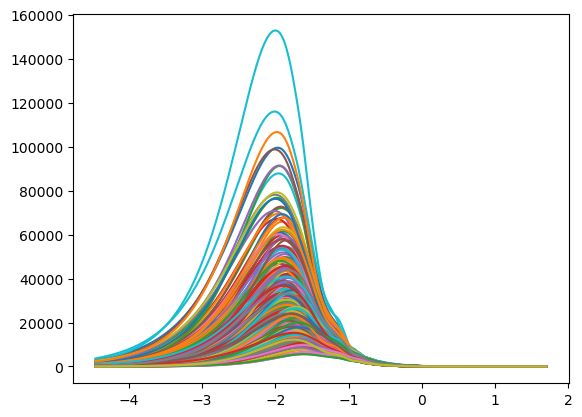

In [104]:
z0_spectra = dataframe.loc['Plin'].values
ks = dataframe.loc['k_grid'].values.flatten()
for spec in z0_spectra:
    plt.plot(np.log10(ks), spec)

In [71]:
folder = folders[20]
folder

'0131'

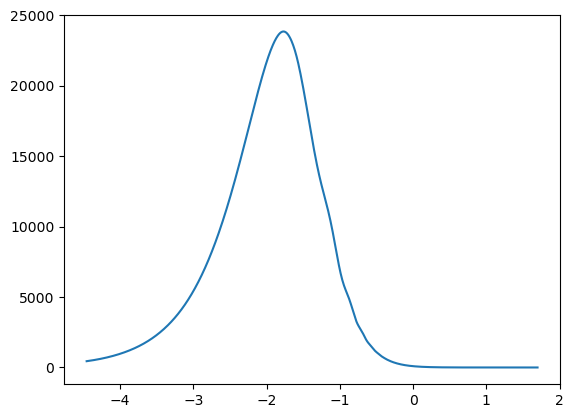

In [121]:
folder = folders[300]
folder

df0, ks, zs = one_folder(folder)
df0.loc["k_grid",:] = ks
df0_z0 = df0[df0.index.get_level_values('redshift')==0.0]

spectra = df0_z0.loc['Plin'].values
kgrid = ks

for sp in spectra:
    plt.plot(np.log10(ks), sp)

In [115]:
df0[df0.index.get_level_values('redshift')==0.0]

,,,,,,,,,,,,,,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
data_type,redshift,parameter_1,parameter_1_value,parameter_2,parameter_2_value,parameter_3,parameter_3_value,parameter_4,parameter_4_value,parameter_5,parameter_5_value,parameter_6,parameter_6_value,,,,,,,,,,,,,,,,,,,,,
Plin,0.0,omega_m,0.33504702194357366,omega_baryon,0.06034482758620689,hubble,73.61598746081505,scalar_spectral_index(1),1.0653291536050156,sigma8,0.6735430721003135,log10fR0,-4.470147554858935,28.274812,28.830715,29.396873,29.973477,30.560727,31.158823,31.76797,32.38838,33.020264,33.663841,...,0.01179,0.011277,0.010786,0.010317,0.009867,0.009438,0.009026,0.008632,0.008256,0.007895


In [77]:
dataframe = pd.DataFrame()
for folder in folders:
    df, ks, zs = one_folder(folder)

    dataframe = pd.concat([dataframe, df])

In [78]:
dataframe.sort_values('redshift')

1    \
data_type redshift parameter_1 parameter_1_value   parameter_2  parameter_2_value    parameter_3 parameter_3_value  parameter_4              parameter_4_value  parameter_5 parameter_5_value  parameter_6 parameter_6_value                 
Plin      0.0      omega_m     0.30896551724137933 omega_baryon 0.05054858934169279  hubble      77.50156739811912  scalar_spectral_index(1) 0.9735423197492163 sigma8      0.6788886520376176 log10fR0    -4.54492697492163     64.471006   
                               0.2623197492163009  omega_baryon 0.06018808777429467  hubble      69.41536050156739  scalar_spectral_index(1) 0.8531661442006269 sigma8      0.8780115047021945 log10fR0    -4.736029937304075   760.976545   
                               0.3470846394984326  omega_baryon 0.03949843260188088  hubble      74.45611285266457  scalar_spectral_index(1) 0.9374294670846395 sigma8      0.7670907210031349 log10fR0    -6.622133087774295    91.818396   
                               0.3380564263322884  omega_baryon 0.061285266457680246 hubble      55.76332288401254  scalar_spectral_index(1) 1.0653291536050156 sigma8      0.8165373354231976 log10fR0    -4.071323981191222    74.585171   
                               0.369153605015674   omega_baryon 0.05227272727272727  hubble      57.54858934169279  scalar_spectral_index(1) 1.145078369905956  sigma8      1.0183329780564265 log10fR0    -5.533677084639498    45.098187   
...                                                                                                                                                                                                                                    ...   
          5.0      omega_m     0.3430721003134796  omega_baryon 0.05744514106583072  hubble      77.39655172413794  scalar_spectral_index(1) 0.7854545454545454 sigma8      0.7550631661442007 log10fR0    -6.372868354231975    15.908229   
                               0.3325391849529781  omega_baryon 0.06183385579937304  hubble      73.19592476489028  scalar_spectral_index(1) 0.9073354231974922 sigma8      0.706952946708464  log10fR0    -5.616765329153605     6.382470   
                               0.39373040752351096 omega_baryon 0.05203761755485893  hubble      54.608150470219435 scalar_spectral_index(1) 0.7613793103448275 sigma8      0.8058461755485894 log10fR0    -5.2844123510971786   27.240974   
                               0.3826959247648903  omega_baryon 0.04772727272727273  hubble      50.407523510971785 scalar_spectral_index(1) 1.152601880877743  sigma8      0.9020666144200629 log10fR0    -4.262426943573668     1.379142   
                               0.32150470219435734 omega_baryon 0.05274294670846395  hubble      57.4435736677116   scalar_spectral_index(1) 1.1149843260188088 sigma8      0.6601791222570533 log10fR0    -4.636324043887147     1.491582   

                                                                                                                                                                                                                                       2    \
data_type redshift parameter_1 parameter_1_value   parameter_2  parameter_2_value    parameter_3 parameter_3_value  parameter_4              parameter_4_value  parameter_5 parameter_5_value  parameter_6 parameter_6_value                 
Plin      0.0      omega_m     0.30896551724137933 omega_baryon 0.05054858934169279  hubble      77.50156739811912  scalar_spectral_index(1) 0.9735423197492163 sigma8      0.6788886520376176 log10fR0    -4.54492697492163     65.587700   
                               0.2623197492163009  omega_baryon 0.06018808777429467  hubble      69.41536050156739  scalar_spectral_index(1) 0.8531661442006269 sigma8      0.8780115047021945 log10fR0    -4.736029937304075   772.184273   
                               0.3470846394984326  omega_baryon 0.03949843260188088  hubble      74.45611285266457  scalar_spectral_index(1) 0.9374294670846395 sigma8      0.7670907210

In [79]:
dataframe_0 = dataframe[dataframe.index.get_level_values('redshift')==4.0]
dataframe_0

1    \
data_type redshift parameter_1 parameter_1_value   parameter_2  parameter_2_value    parameter_3 parameter_3_value  parameter_4              parameter_4_value  parameter_5 parameter_5_value  parameter_6 parameter_6_value                
Plin      4.0      omega_m     0.30896551724137933 omega_baryon 0.05054858934169279  hubble      77.50156739811912  scalar_spectral_index(1) 0.9735423197492163 sigma8      0.6788886520376176 log10fR0    -4.54492697492163     4.139852   
                               0.29391849529780567 omega_baryon 0.047492163009404384 hubble      61.43416927899686  scalar_spectral_index(1) 1.054796238244514  sigma8      1.0624340125391851 log10fR0    -4.470147554858935    9.941619   
                               0.39373040752351096 omega_baryon 0.05203761755485893  hubble      54.608150470219435 scalar_spectral_index(1) 0.7613793103448275 sigma8      0.8058461755485894 log10fR0    -5.2844123510971786  39.116274   
                               0.3205015673981191  omega_baryon 0.05485893416927899  hubble      83.5924764890282   scalar_spectral_index(1) 0.8170532915360501 sigma8      0.847274420062696  log10fR0    -5.9657359561128525  22.560929   
                               0.2482758620689655  omega_baryon 0.061442006269592474 hubble      77.81661442006269  scalar_spectral_index(1) 0.9208777429467084 sigma8      0.640133197492163  log10fR0    -5.417353542319749   16.912431   
...                                                                                                                                                                                                                                   ...   
                               0.3852037617554859  omega_baryon 0.06026645768025078  hubble      77.92163009404388  scalar_spectral_index(1) 0.9058307210031348 sigma8      0.7430356112852665 log10fR0    -5.30103              5.120257   
                               0.3646394984326019  omega_baryon 0.04561128526645768  hubble      70.78056426332287  scalar_spectral_index(1) 0.7779310344827586 sigma8      0.8312376802507838 log10fR0    -5.400735893416928   24.389458   
                               0.38821316614420065 omega_baryon 0.04905956112852664  hubble      82.01724137931035  scalar_spectral_index(1) 0.9569905956112852 sigma8      0.8045097805642634 log10fR0    -4.02977985893417     2.552978   
                               0.3335423197492163  omega_baryon 0.06003134796238244  hubble      59.43887147335423  scalar_spectral_index(1) 0.9103448275862069 sigma8      0.9581952037617556 log10fR0    -5.716471222570533   25.431357   
                               0.32150470219435734 omega_baryon 0.05274294670846395  hubble      57.4435736677116   scalar_spectral_index(1) 1.1149843260188088 sigma8      0.6601791222570533 log10fR0    -4.636324043887147    2.148348   

                                                                                                                                                                                                                                      2    \
data_type redshift parameter_1 parameter_1_value   parameter_2  parameter_2_value    parameter_3 parameter_3_value  parameter_4              parameter_4_value  parameter_5 parameter_5_value  parameter_6 parameter_6_value                
Plin      4.0      omega_m     0.30896551724137933 omega_baryon 0.05054858934169279  hubble      77.50156739811912  scalar_spectral_index(1) 0.9735423197492163 sigma8      0.6788886520376176 log10fR0    -4.54492697492163     4.212133   
                               0.29391849529780567 omega_baryon 0.047492163009404384 hubble      61.43416927899686  scalar_spectral_index(1) 1.054796238244514  sigma8      1.0624340125391851 log10fR0    -4.470147554858935   10.132819   
                               0.39373040752351096 omega_baryon 0.05203761755485893  hubble      54.608150470219435 scalar_spectral_index(1) 0.7613793103448275 sigma8      0.8058461755485894 log10fR0 

In [80]:
spectra_0 = dataframe_0.loc['Plin'].values

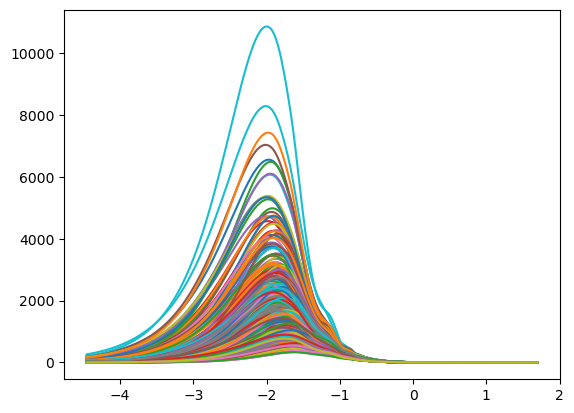

In [81]:
for sp0 in spectra_0:
    plt.plot(np.log10(ks), sp0)

In [69]:
test_single = df0[df0.index.get_level_values('redshift')==4.0].loc['Plin'].values.flatten()
test_full_temp = dataframe_0[dataframe_0.index.get_level_values('parameter_1_value')=='0.30896551724137933']
test_full = test_full_temp[test_full_temp.index.get_level_values('parameter_2_value')=='0.05054858934169279'].loc['Plin'].values.flatten()

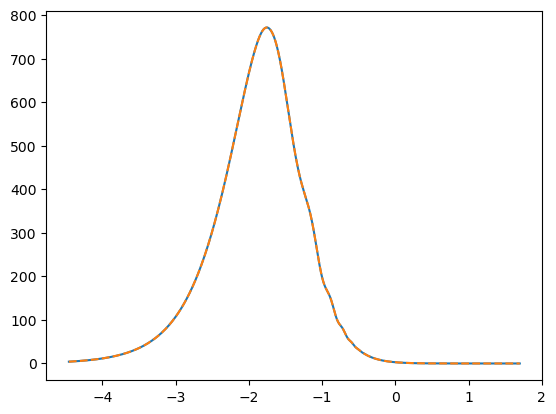

In [70]:
plt.plot(np.log10(ks), test_single)
plt.plot(np.log10(ks), test_full, linestyle='--')